In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**This is Data For US Health Insurance I asked Various Questions and made visualization.****

In [37]:

insurance = pd.read_csv('/kaggle/input/ushealthinsurancedataset/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [39]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [40]:
insurance.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

## 1. How is age related to medical costs?

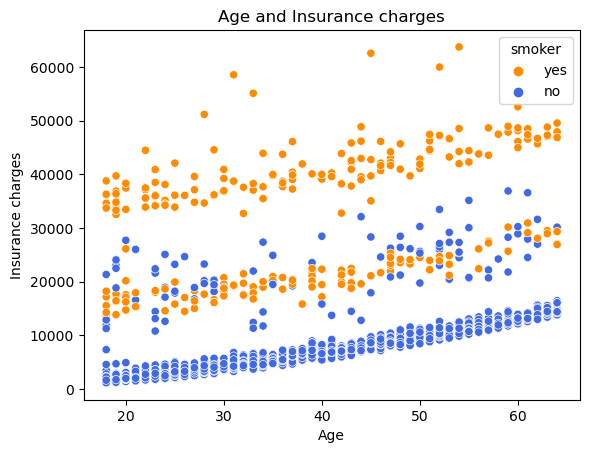

In [41]:
sns.set_palette(['darkorange', '#4169E1'])
ax = sns.scatterplot(data=insurance, x='age', y='charges',hue='smoker')
ax.set(title='Age and Insurance charges',
      xlabel='Age',
      ylabel='Insurance charges')
plt.show()

In [42]:
insurance['age'].corr(insurance['charges'])

0.29900819333064754

In [43]:
# As we can see from the given plot above, generally, the trend between age and charges is increasing.However, 
# age is not likely the main point of insurance charges. if we consider smoking habit, the smoker will be charged 
# higher than non-smoker obviously.

## 2. How is number of children related to medical costs?

In [44]:
children = insurance.groupby('children')['charges'].mean()
children

children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

In [45]:
children1 = insurance.groupby('children')['charges'].median()
children1

children
0     9856.95190
1     8483.87015
2     9264.97915
3    10600.54830
4    11033.66170
5     8589.56505
Name: charges, dtype: float64

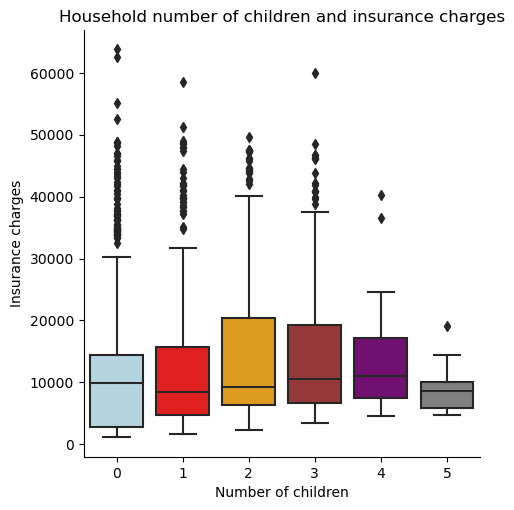

In [46]:
colors = ['lightblue','red','orange','brown','purple','grey']
g = sns.catplot(data=insurance, x='children', y='charges', kind='box', palette=colors)
for ax in g.axes.flat:
    ax.set(title='Household number of children and insurance charges',
          xlabel='Number of children',
          ylabel='Insurance charges')
plt.show()

In [47]:
insurance['children'].corr(insurance['charges'])

0.0679982268479048

In [48]:
# The insurance charges and household children number doesn't have strong linear relationship, and there are 
# many outliers in the data.  Using median for review will be better than mean. As we can see, number of children 
# doesn't relate a lots with costs. The median charges of 4 children is slightly more than others.

## 3. How is the number of people distributed by region?

In [49]:
group = insurance.groupby('region').count()
group

,age,sex,bmi,children,smoker,charges
region,,,,,,
northeast,324,324,324,324,324,324
northwest,325,325,325,325,325,325
southeast,364,364,364,364,364,364
southwest,325,325,325,325,325,325


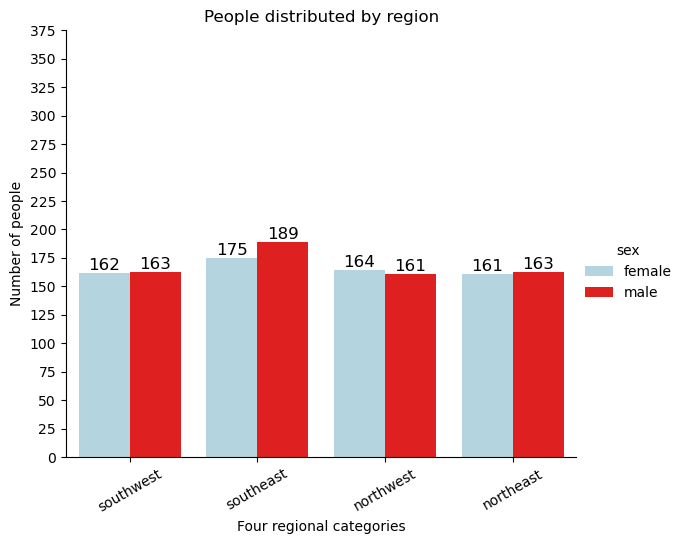

In [50]:
g = sns.catplot(data=insurance, x='region',hue='sex', kind='count', aspect=1.2, palette=colors)
for ax in g.axes.flat:
    ax.set(title='People distributed by region', xlabel='Four regional categories', ylabel='Number of people')
    ax.set_yticks([y for y in range(0, 400, 25)])
    ax.tick_params('x', labelrotation=30)
    
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{round(height)}', (p.get_x()+p.get_width()/2, height), ha='center', va='bottom', color='black', size=12)

In [51]:
# From the information, people are distributed fairly even at four regions. Among them the SouthEast region has the
# most number of people in data.

## 4. How is the number of people distributed by age?

In [52]:
insurance_count_by_age = insurance.groupby('age')[['age']].count()
insurance_count_by_age = insurance_count_by_age.rename(columns={'age': 'count'})
insurance_count_by_age.T

age,18,19,20,21,22,23,24,25,26,27,...,55,56,57,58,59,60,61,62,63,64
count,69,68,29,28,28,28,28,28,28,28,...,26,26,26,25,25,23,23,23,23,22


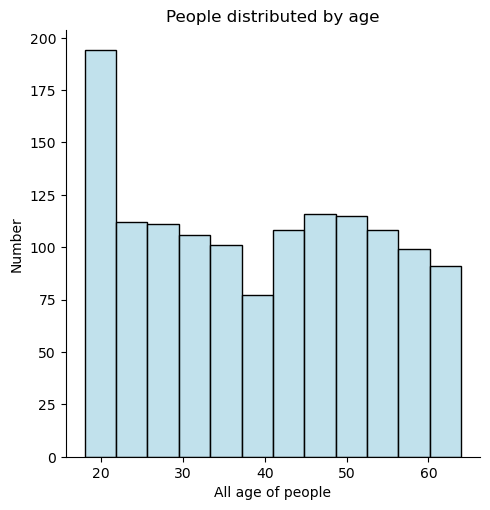

In [53]:
g = sns.displot(data=insurance, x='age', kind='hist',color='lightblue', aspect=1, legend=False)
for ax in g.axes.flat:
    ax.set(title='People distributed by age',
          xlabel='All age of people',
           ylabel='Number')
plt.show()

In [54]:
# The histogram shows the distribution of ages for individuals in the 'ins_data' DataFrame, with a peak in the 
# mid-20s and a gradually decreasing number of individuals at older ages.

## 5. How are the charges distributed?

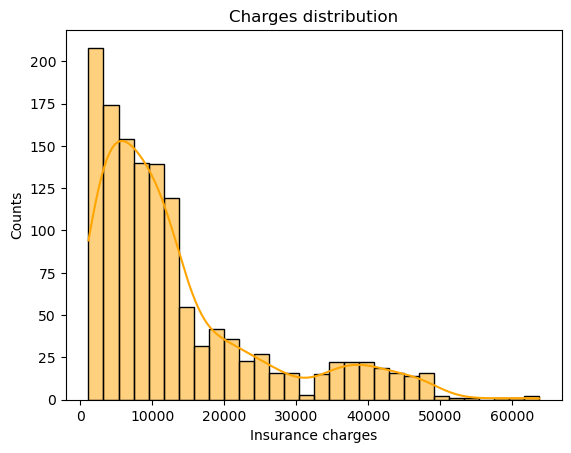

In [55]:
ax = sns.histplot(data=insurance, x='charges', kde=True, color='orange')
ax.set(title='Charges distribution', 
       xlabel='Insurance charges', 
       ylabel='Counts')
       
plt.show()

In [56]:
# The histogram shows insurance charges for a sample of individuals, with most falling between 0-25,000 and some 
# exceeding 60,000. A slightly skewed distribution is evident, with a longer tail on the right side.

## 6.Bin the BMI column

In [57]:
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity class I', 'Obesity class II', 'Obesity class III']
ranges = ['<18.5', '18.5-24.9', '25-29.9', '30-34.9', '35-39.9','>=40']
pd.DataFrame(list(zip(labels, ranges)),columns=['labels', 'ranges'])

,labels,ranges
0,Underweight,<18.5
1,Normal weight,18.5-24.9
2,Overweight,25-29.9
3,Obesity class I,30-34.9
4,Obesity class II,35-39.9
5,Obesity class III,>=40


In [58]:
insurance['bmi_class'] = pd.cut(insurance.bmi, bins=[0, 18.5, 25, 30, 35, 40, 100],
      labels=['Underweight', 'Normal weight', 'Overweight', 'Obesity class I', 'Obesity class II', 'Obesity class III'])
insurance.head()

,age,sex,bmi,children,smoker,region,charges,bmi_class
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obesity class I
2,28,male,33.000,3,no,southeast,4449.46200,Obesity class I
3,33,male,22.705,0,no,northwest,21984.47061,Normal weight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


In [59]:
# I have used the given criteria above to divide the bmi into 6 categories : Underweight, Normal weight, 
# Overweight, Obesity class I,  Obesity class II, and Obesity class III .

## 7.How are the charges related to the bmi?

[Text(0.5, 1.0, 'Insurance charges related to BMI'),
 Text(0.5, 0, 'BMI'),
 Text(0, 0.5, 'Insurance charges')]

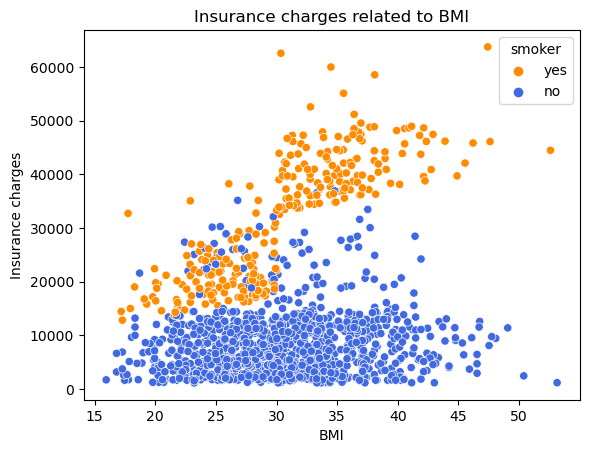

In [60]:
sns.set_palette(['darkorange', '#4169E1'])
ax = sns.scatterplot(data=insurance, x='bmi', y='charges', hue='smoker')
ax.set(title = 'Insurance charges related to BMI',
      xlabel = 'BMI',
      ylabel = 'Insurance charges')

In [61]:
# In this scatter plot, bmi and charges have weak linear relationship, we can assume that there is other factor more
# effective than bmi. If add smoker into the plot, apparently, smokers will be charged much more than non-smokers.

## 8.How is the smoker status related to the charges?

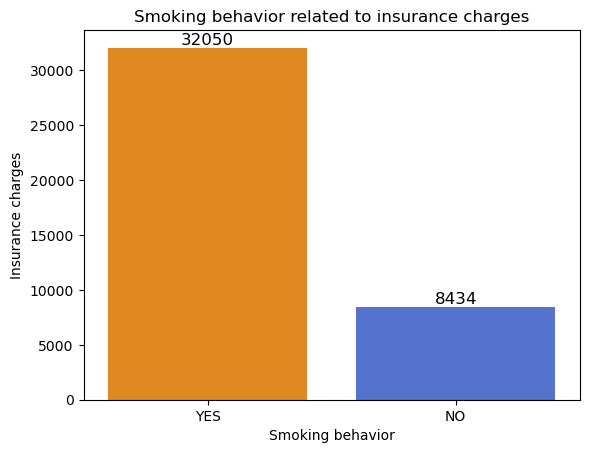

In [62]:
sns.set_palette(['darkorange', '#4169E1'])
ax = sns.barplot(data=insurance, x='smoker', y='charges', errorbar=None)
ax.set(title = 'Smoking behavior related to insurance charges',
      xlabel = 'Smoking behavior',
      ylabel = 'Insurance charges',
      xticklabels = ['YES', 'NO'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{round(height)}', (p.get_x()+p.get_width()/2, height), ha='center', va='bottom', color='black', size=12)

In [63]:
# The plot tells us that the usually insurance charges of smoker is much higher than non-smoker.

## 9.How are the charges related to the region?

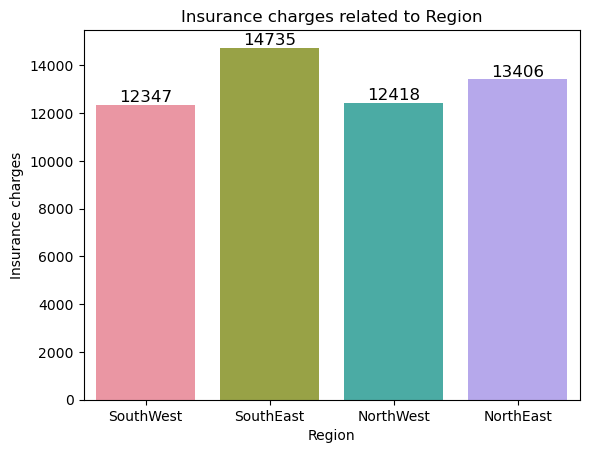

In [64]:
sns.set_palette(['darkorange', '#4169E1'])
ax = sns.barplot(data=insurance, x='region', y='charges', errorbar=None)
ax.set(title = 'Insurance charges related to Region',
      xlabel = 'Region',
      ylabel = 'Insurance charges',
      xticklabels = ['SouthWest', 'SouthEast', 'NorthWest', 'NorthEast'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{round(height)}', (p.get_x()+p.get_width()/2, height), ha='center', va='bottom', color='black', size=12)

In [65]:
# The bar plot shows that the average insurance charges in SouthEast region is slightly higher than other three 
# regions. The ranking is SouthEast, NorthEast, NorthWest, and then SouthWest.

## 10.Which region has the highest obesity percentage?

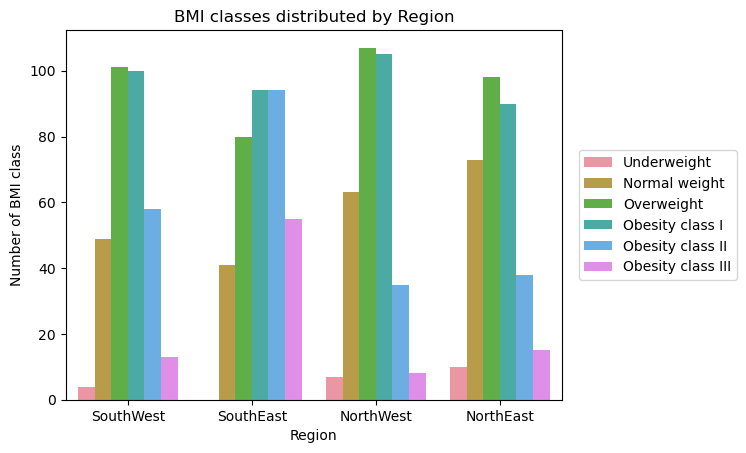

In [66]:
sns.set_palette(['darkorange', '#4169E1'])
ax = sns.countplot(data=insurance, x='region', hue='bmi_class')
ax.set(title = 'BMI classes distributed by Region',
      xlabel = 'Region',
      ylabel = 'Number of BMI class',
      xticklabels = ['SouthWest', 'SouthEast', 'NorthWest', 'NorthEast'])
plt.legend(loc='center left',bbox_to_anchor=(1.02, 0.5))

In [67]:
# All of BMI classes distribution in four regions, I am going to combine the BMI classes into two classes only, 
# Obesity and Non-Nbesity.

In [68]:
def bmi_class_convert(row):
    if row.bmi_class == 'Obesity class I':
        return 'Obesity'
    elif row.bmi_class == 'Obesity class II':
        return 'Obesity'
    elif row.bmi_class == 'Obesity class III':
        return 'Obesity'
    else:
        return 'Non Obesity'
    
insurance['bmi_class']= insurance.apply(bmi_class_convert, axis=1)
insurance['bmi_class'].value_counts()

Obesity        705
Non Obesity    633
Name: bmi_class, dtype: int64

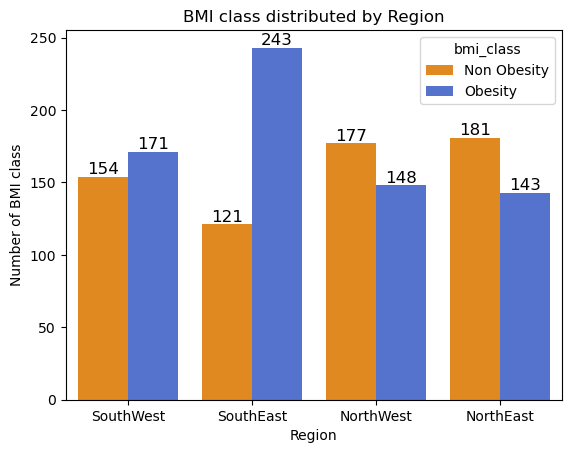

In [69]:
sns.set_palette(['darkorange', '#4169E1'])
ax = sns.countplot(data=insurance, x='region', hue='bmi_class')
ax.set(title = 'BMI class distributed by Region',
      xlabel = 'Region',
      ylabel = 'Number of BMI class',
      xticklabels = ['SouthWest', 'SouthEast', 'NorthWest', 'NorthEast'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{round(height)}', (p.get_x()+p.get_width()/2, height), ha='center', va='bottom', color='black', size=12)

In [70]:
# After combined and distinguished the bmi_class into Obesity and Non-Obesity,no matter I, II, or III class of 
# Obesity are belong to Obesity it is obvious that SouthEast region has the highest percentage of Obesity than 
# other region.